In [18]:
import sys
import os
if 'network' in sys.modules:
    del sys.modules['network']
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from network import Network
import matplotlib.pyplot as plt

In [19]:
def testing_network(datasets):
    for dataset_name in datasets:
        BASE_DIR = os.path.dirname(os.path.abspath(__file__))
        ruta_archivo = os.path.join(BASE_DIR, "../data/"+dataset_name)
        data = np.loadtxt(ruta_archivo, delimiter=',', dtype=int)
        X = data[:, :-1]
        y = data[:, -1] 

        dataset = [(X[i], [y[i]]) for i in range(len(X))]

        train_size = int(len(dataset) * 0.8)
        train_data = dataset[:train_size]
        test_data = dataset[train_size:]

        network1 = Network([2, 30, 1])
        network1.SGD(train_data, 10, 10, 0.5)
        accuracy, prediction = network1.evaluate(test_data)
        print('accuracy '+dataset_name )
        print(accuracy)

datasets = ['and_test.csv', 'or_test.csv', 'xor_test.csv']
# testing_network(datasets)


# ------------- training the mnist dataset -------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28*28) / 255
X_test = X_test.reshape(-1, 28*28) / 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

def one_hot(y, n_classes=10):
    oh = np.zeros((y.size, n_classes))
    oh[np.arange(y.size), y] = 1
    return oh

y_train_oh = one_hot(y_train)
y_test_oh = one_hot(y_test)
y_val_oh = one_hot(y_val)
training_data = list(zip(X_train, y_train_oh))
test_data = list(zip(X_test, y_test_oh))
val_data = list(zip(X_val, y_val_oh))

In [20]:
#Let's evaluate the performance of the neural network whithout using hyperparameters that enhance it's accuracy
net_mnist1 =  Network([784, 70, 70, 10])
training_cost1, training_accuracy1, evaluation_cost1, evaluation_accuracy1 = \
        net_mnist1.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist1.evaluate(test_data)
print('MNIST model Accuracy whithout any hyperparameter')
print(accuracy)

MNIST model Accuracy whithout any hyperparameter
0.9537


In [ ]:
#This is how the performance changes using the cost entropy function
net_mnist2 =  Network([784, 70, 70, 10], cost='cross_entropy')
training_cost2, training_accuracy2, evaluation_cost2, evaluation_accuracy2 = \
        net_mnist2.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist2.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9656


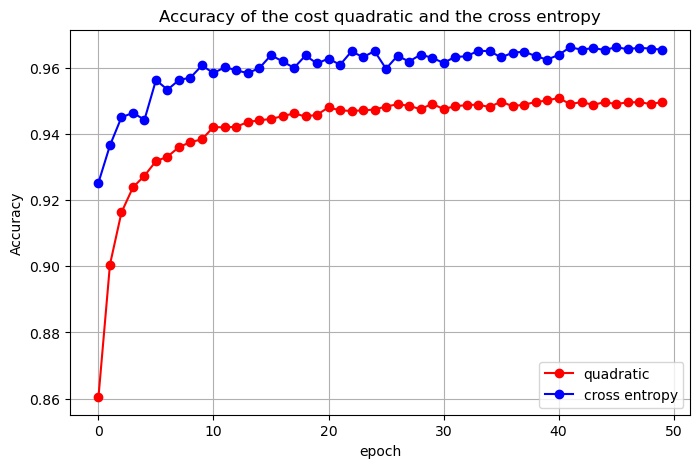

In [22]:
#plotting the difference between the cost quadratic and the cross entropy in the accuracy
acc_data1 = np.array(evaluation_accuracy1)
acc_data2 = np.array(evaluation_accuracy2)
plt.figure(figsize=(8,5))
plt.plot(acc_data1, marker='o', linestyle='-', color='r', label='quadratic')
plt.plot(acc_data2, marker='o', linestyle='-', color='b', label='cross entropy')
plt.title('Accuracy of the cost quadratic and the cross entropy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

There's a clear domination of the cost function cross entropy, which performs betters againts the quadratic cost function, reaching a better accuracy sooner and better in the of the epochs.
This happens because the quadratic cost functions is multiplied  by the sigmoid derivate which causing a slow down when the derivate is near of 0 o 1

In [25]:
#Comparison of the accuracy with a random weight initializer and the Gaussian
net_mnist3 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian')
training_cost3, training_accuracy3, evaluation_cost3, evaluation_accuracy3 = \
        net_mnist3.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist3.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9745


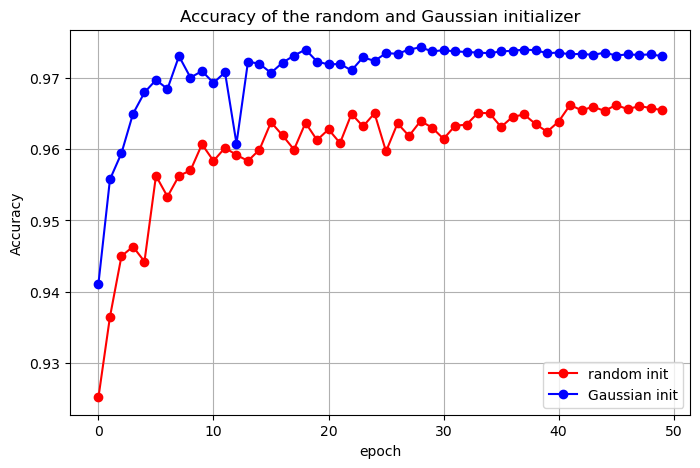

In [26]:
acc_data2 = np.array(evaluation_accuracy2)
acc_data3 = np.array(evaluation_accuracy3)
plt.figure(figsize=(8,5))
plt.plot(acc_data2, marker='o', linestyle='-', color='r', label='random init')
plt.plot(acc_data3, marker='o', linestyle='-', color='b', label='Gaussian init')
plt.title('Accuracy of the random and Gaussian initializer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The Guassian initializer is the clear winner for better performance. This is because its normal distribution for the weights prevents extreme values, which helps to keep the error signal from exploding or vanishing across the layers

In [37]:
#Like in others models the regularization is a great improvement to avoid the overfitting. Let's se how the model works with the lambda hyperparameter
net_mnist4 =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', lmbda=0.01)
training_cost4, training_accuracy4, evaluation_cost4, evaluation_accuracy4 = \
        net_mnist4.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist4.evaluate(test_data)
print('MNIST model Accuracy whit the cross entropy function')
print(accuracy)

MNIST model Accuracy whit the cross entropy function
0.9683


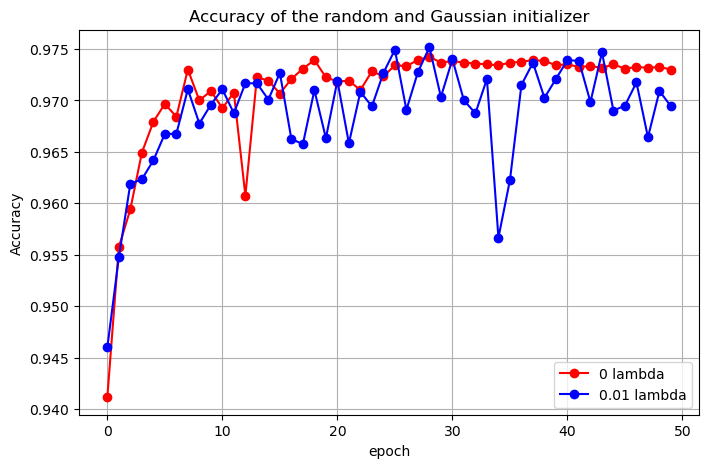

In [41]:
acc_data3 = np.array(evaluation_accuracy3)
acc_data4 = np.array(evaluation_accuracy4)
plt.figure(figsize=(8,5))
plt.plot(acc_data3, marker='o', linestyle='-', color='r', label='0 lambda')
plt.plot(acc_data4, marker='o', linestyle='-', color='b', label='0.01 lambda')
plt.title('Accuracy of the random and Gaussian initializer')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

The lambda parameter effectively enhances performance on the validation data, resulting in higger accuracy. This is a iterative process where the value is adjusted until a good accuracy is achieved.

In [39]:
net_mnist =  Network([784, 70, 70, 10], cost='cross_entropy', initializer='Gaussian', n_early_stop=10)
training_cost, training_accuracy, evaluation_cost, evaluation_accuracy = net_mnist.SGD(training_data, epochs=50, batch_size=25, lr=1.6, validation_data=val_data)
cost, accuracy = net_mnist.evaluate(test_data)
print('MNIST model Accuracy')
print(accuracy)

Early stopping: no improvement in 10 epochs
MNIST model Accuracy
0.9691


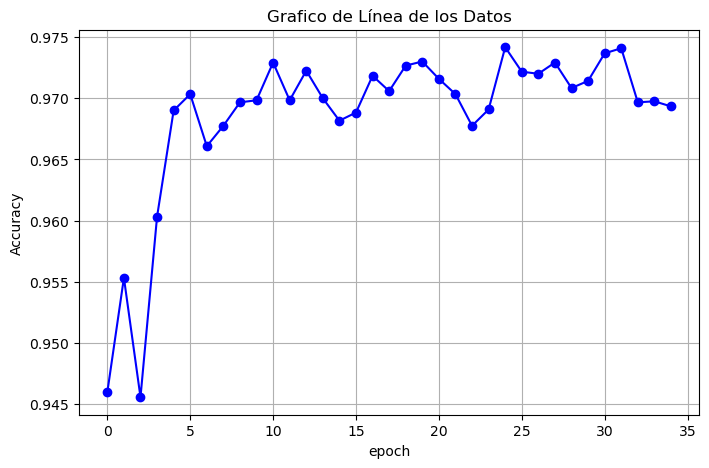

In [40]:
acc_data = np.array(evaluation_accuracy)
plt.figure(figsize=(8,5))
plt.plot(acc_data, marker='o', linestyle='-', color='b')
plt.title('Grafico de Línea de los Datos')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()